In [1]:
import pandas as pd
import os

base_dir = os.getcwd()
# Chemins des sous-dossiers pour train et test
file_path = os.path.join(base_dir, r'data\donnees-historiques\prix\hourly_day_ahead_prices_2017_2020.parquet')
"""
file2_path = '/content/drive/MyDrive/AugmentForecast/data/scenarios-synthetiques/prix/00257.parquet'
file3_path = '/content/drive/MyDrive/AugmentForecast/data/scenarios-synthetiques/prix/00724.parquet'
"""
data = pd.read_parquet(file_path)

"""
data2 = pd.read_parquet(file2_path)
data3 = pd.read_parquet(file3_path)
"""


# Dossier contenant les fichiers Parquet
parquet_dir = os.path.join(base_dir, r'data\scenarios-synthetiques\prix')

# Liste pour stocker les DataFrames
synthetic_data_list = []

# Charger chaque fichier Parquet
for file in os.listdir(parquet_dir):
    if file.endswith(".parquet"):
        file_path = os.path.join(parquet_dir, file)
        synthetic_data_list.append(pd.read_parquet(file_path))

# Combiner tous les DataFrames en un seul
synthetic_data = pd.concat(synthetic_data_list)

# Vérifier les données combinées
print(synthetic_data.head())


horizons = [6, 12, 24, 48, 72, 168, 8760]  # En heures

   price  dayofweek  hourofday
0  31.66          0          0
1  31.06          0          1
2  27.81          0          2
3  27.54          0          3
4  25.04          0          4


In [2]:
data.describe()

,price
count,35064.000000
mean,41.697606
std,18.600285
min,-75.820000
25%,30.180000
50%,39.900000
75%,51.422500
max,259.950000


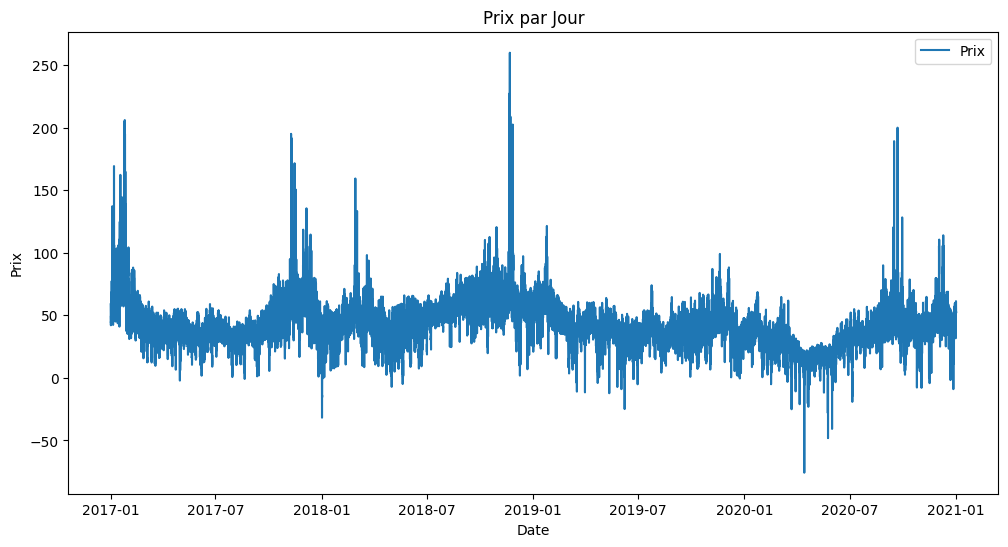

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['price'], label='Prix')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.title('Prix par Jour')
plt.legend()
plt.show()

In [4]:
# Conversion de l'index des données synthétiques en Timestamp avec UTC
synthetic_data.index = pd.to_datetime(synthetic_data.index, unit='h', origin='2016-12-31 23:00:00', utc=True)
synthetic_data.rename(columns={"index": "date"}, inplace=True)  # Renommer la colonne


In [5]:
synthetic_data = synthetic_data.drop(columns=["hourofday","dayofweek"])  # Supprimer

In [6]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5381376 entries, 2016-12-31 23:00:00+00:00 to 2020-12-26 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   price   float64
dtypes: float64(1)
memory usage: 82.1 MB


In [7]:
"""
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(synthetic_data.index, synthetic_data['price'], label='Prix')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.title('Prix par Jour')
plt.legend()
plt.show()
"""

"\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(12, 6))\nplt.plot(synthetic_data.index, synthetic_data['price'], label='Prix')\nplt.xlabel('Date')\nplt.ylabel('Prix')\nplt.title('Prix par Jour')\nplt.legend()\nplt.show()\n"

### gestion du volume des données synthetiques

In [8]:
# Agrégation horaire (moyenne des scénarios pour chaque heure)
synthetic_aggregated = synthetic_data.groupby(level=0).mean()


In [9]:
print(synthetic_data.info())
print(synthetic_data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5381376 entries, 2016-12-31 23:00:00+00:00 to 2020-12-26 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   price   float64
dtypes: float64(1)
memory usage: 82.1 MB
None
              price
count  5.381376e+06
mean   4.165089e+01
std    1.797841e+01
min   -7.582000e+01
25%    3.048000e+01
50%    3.986000e+01
75%    5.100000e+01
max    2.599500e+02


In [10]:
print(synthetic_aggregated.info())
print(synthetic_aggregated.describe())
print(synthetic_aggregated.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34944 entries, 2016-12-31 23:00:00+00:00 to 2020-12-26 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   34944 non-null  float64
dtypes: float64(1)
memory usage: 546.0 KB
None
              price
count  34944.000000
mean      41.650886
std        8.713591
min       18.554221
25%       34.008994
50%       42.948864
75%       48.271737
max       68.028052
                           price
2016-12-31 23:00:00+00:00  31.66
2017-01-01 00:00:00+00:00  31.06
2017-01-01 01:00:00+00:00  27.81
2017-01-01 02:00:00+00:00  27.54
2017-01-01 03:00:00+00:00  25.04


In [11]:
"""
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(synthetic_aggregated.index, synthetic_aggregated['price'], label='Prix')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.title('Prix par Jour')
plt.legend()
plt.show()
"""

"\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(12, 6))\nplt.plot(synthetic_aggregated.index, synthetic_aggregated['price'], label='Prix')\nplt.xlabel('Date')\nplt.ylabel('Prix')\nplt.title('Prix par Jour')\nplt.legend()\nplt.show()\n"

### FUsion

In [12]:
data_combined = pd.concat([data, synthetic_aggregated]).sort_index()
#Calcul de la moyenne des valeurs par heure après concaténation
data_combined = data_combined.groupby(level=0).mean()


# Vérification des données combinées
print(data_combined.info())
print(data_combined.describe())
print(data_combined.head())





<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2016-12-31 23:00:00+00:00 to 2020-12-31 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   35064 non-null  float64
dtypes: float64(1)
memory usage: 547.9 KB
None
              price
count  35064.000000
mean      41.674980
std       11.830133
min      -15.532597
25%       33.515755
50%       41.301380
75%       48.877265
max      156.251753
                            price
2016-12-31 23:00:00+00:00  45.240
2017-01-01 00:00:00+00:00  44.645
2017-01-01 01:00:00+00:00  39.880
2017-01-01 02:00:00+00:00  37.405
2017-01-01 03:00:00+00:00  35.265


In [13]:
# Vérifiez qu'il n'y a pas de valeurs manquantes
print(data_combined.isna().sum())

price    0
dtype: int64


### train

In [14]:
# Créer des features temporelles
data_combined['hour'] = data_combined.index.hour  # Heure de la journée
data_combined['day_of_week'] = data_combined.index.dayofweek  # Jour de la semaine (0 = Lundi)
data_combined['is_weekend'] = (data_combined['day_of_week'] >= 5).astype(int)  # 1 = Week-end

# Ajouter des décalages temporels (lag features)
data_combined['price_lag_1'] = data_combined['price'].shift(1)  # Lag de 1
data_combined['price_lag_24'] = data_combined['price'].shift(24)  # Lag d'une journée (pour données horaires)

# Supprimer les lignes avec des NaN (causés par les lags)
data_combined.dropna(inplace=True)

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Normalisation des colonnes numériques
scaler = MinMaxScaler()
data_combined[['price_scaled', 'price_lag_1', 'price_lag_24']] = scaler.fit_transform(data_combined[['price', 'price_lag_1', 'price_lag_24']])

In [16]:
# Division temporelle des données
train = data_combined[:'2019']
test = data['2020':]

# Vérifier les dimensions des ensembles
print(f"Train : {train.shape[0]} lignes")
print(f"Test : {test.shape[0]} lignes")



Train : 26257 lignes
Test : 8783 lignes


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26257 entries, 2017-01-01 23:00:00+00:00 to 2019-12-31 23:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         26257 non-null  float64
 1   hour          26257 non-null  int32  
 2   day_of_week   26257 non-null  int32  
 3   is_weekend    26257 non-null  int64  
 4   price_lag_1   26257 non-null  float64
 5   price_lag_24  26257 non-null  float64
 6   price_scaled  26257 non-null  float64
dtypes: float64(4), int32(2), int64(1)
memory usage: 1.4 MB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8783 entries, 2020-01-01 00:00:00+00:00 to 2020-12-31 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   8783 non-null   float64
dtypes: float64(1)
memory usage: 137.2 KB


In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

# Liste pour stocker les prédictions par horizon
# Liste pour stocker les prédictions
model_name='SARIMAX'
predictions = {}

# Ajout de tqdm pour suivre la progression
for horizon in tqdm(horizons, desc="Prédiction Multi-Horizons"):
    # Entraîner un modèle SARIMA pour chaque horizon
    model = SARIMAX(train['price'],
                    order=(1, 1, 1),  # ARIMA(p, d, q)
                    seasonal_order=(1, 1, 1, 24),  # Période saisonnière
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    sarima_model = model.fit(disp=False)

    # Faire des prédictions sur l'horizon défini
    forecast = sarima_model.forecast(steps=horizon)
    predictions[horizon] = forecast




Prédiction Multi-Horizons:   0%|          | 0/7 [00:00<?, ?it/s]c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
Prédiction Multi-Horizons:  14%|█▍        | 1/7 [00:35<03:35, 35.84s/it]c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\akues\OneDrive\Documents\GitHub\AugmentForecast\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: N

In [20]:

# Ajouter les données réelles pour chaque horizon
for horizon in horizons:
    test[f'price_horizon_{horizon}'] = test['price'].shift(-horizon)  # Décalage pour comparer

# Vérifier les données
print(test.head(90))


C:\Users\akues\AppData\Local\Temp\ipykernel_4216\1857892762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'price_horizon_{horizon}'] = test['price'].shift(-horizon)  # Décalage pour comparer


                           price  price_horizon_6  price_horizon_12  \
date                                                                  
2020-01-01 00:00:00+00:00  38.60            30.00             30.04   
2020-01-01 01:00:00+00:00  36.55            30.65             30.75   
2020-01-01 02:00:00+00:00  32.32            30.65             32.11   
2020-01-01 03:00:00+00:00  30.85            30.27             35.98   
2020-01-01 04:00:00+00:00  30.14            30.34             40.40   
...                          ...              ...               ...   
2020-01-04 13:00:00+00:00  31.83            39.53             31.18   
2020-01-04 14:00:00+00:00  31.95            34.46             30.10   
2020-01-04 15:00:00+00:00  32.25            39.75             29.96   
2020-01-04 16:00:00+00:00  41.81            37.95             29.88   
2020-01-04 17:00:00+00:00  44.24            33.10             30.38   

                           price_horizon_24  price_horizon_48  \
date       

C:\Users\akues\AppData\Local\Temp\ipykernel_4216\1857892762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'price_horizon_{horizon}'] = test['price'].shift(-horizon)  # Décalage pour comparer
C:\Users\akues\AppData\Local\Temp\ipykernel_4216\1857892762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'price_horizon_{horizon}'] = test['price'].shift(-horizon)  # Décalage pour comparer
C:\Users\akues\AppData\Local\Temp\ipykernel_4216\1857892762.py:3: SettingWithCopyWarning: 
A value is tryi

In [21]:


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialiser un dictionnaire pour stocker les métriques
metrics = {}

# Évaluer pour chaque horizon
# Ajuster la taille de actual et predicted pour chaque horizon
for horizon in horizons:
    # Données réelles ajustées pour correspondre à la longueur des prédictions
    actual = test[f'price_horizon_{horizon}'].iloc[:len(predictions[horizon])].dropna()

    # Prédictions pour l'horizon
    predicted = predictions[horizon]

    # Remplacer l'index de predicted par celui de actual
    predicted.index = actual.index


    # Calculer les métriques uniquement sur les tailles correspondantes
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    # Stocker les métriques
    metrics[horizon] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

# Afficher les métriques
for horizon, metric in metrics.items():
    print(f"Horizon {horizon}h : MAE = {metric['MAE']:.2f}, RMSE = {metric['RMSE']:.2f}, MAPE = {metric['MAPE']:.2f}%")


ValueError: Length mismatch: Expected axis has 8760 elements, new values have 23 elements

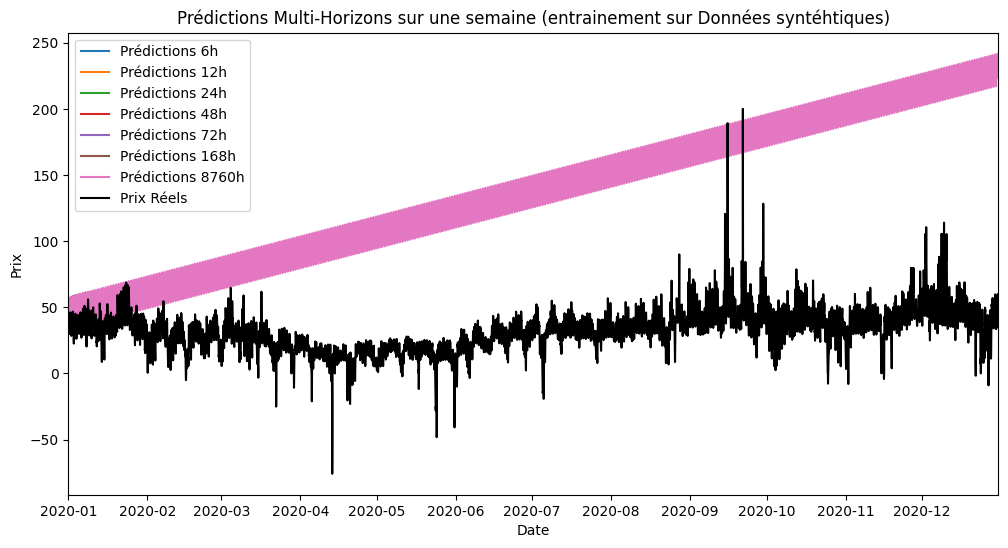

In [101]:

import matplotlib.pyplot as plt

# Visualiser les prédictions vs. les valeurs réelles
plt.figure(figsize=(12, 6))

for horizon in horizons:
    plt.plot(test.index[:len(predictions[horizon])], predictions[horizon], label=f'Prédictions {horizon}h')

# Tracer les données réelles
plt.plot(test.index, test['price'], label='Prix Réels', color='black')

plt.title('Prédictions Multi-Horizons sur une semaine (entrainement sur Données syntéhtiques)')
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31'))
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()




In [82]:
print(test.info())  # Vérifie si test couvre toute l'année
print(test.tail())  # Aperçu des premières valeurs
len(test)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8783 entries, 2020-01-01 00:00:00+00:00 to 2020-12-31 22:00:00+00:00
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               8783 non-null   float64
 1   price_horizon_6     8777 non-null   float64
 2   price_horizon_12    8771 non-null   float64
 3   price_horizon_24    8759 non-null   float64
 4   price_horizon_48    8735 non-null   float64
 5   price_horizon_72    8711 non-null   float64
 6   price_horizon_168   8615 non-null   float64
 7   price_horizon_8760  23 non-null     float64
dtypes: float64(8)
memory usage: 617.6 KB
None
                           price  price_horizon_6  price_horizon_12  \
date                                                                  
2020-12-31 18:00:00+00:00  60.54              NaN               NaN   
2020-12-31 19:00:00+00:00  56.75              NaN               NaN   
2020-12-31 20:00:00+00:00

8783

In [91]:
actual.head(26)

2020-01-01 00:00:00+00:00    37.03
2020-01-01 01:00:00+00:00    35.25
2020-01-01 02:00:00+00:00    31.82
2020-01-01 03:00:00+00:00    31.67
2020-01-01 04:00:00+00:00    34.00
2020-01-01 05:00:00+00:00    38.32
2020-01-01 06:00:00+00:00    45.86
2020-01-01 07:00:00+00:00    50.47
2020-01-01 08:00:00+00:00    54.07
2020-01-01 09:00:00+00:00    54.66
2020-01-01 10:00:00+00:00    54.00
2020-01-01 11:00:00+00:00    54.88
2020-01-01 12:00:00+00:00    52.36
2020-01-01 13:00:00+00:00    53.08
2020-01-01 14:00:00+00:00    56.54
2020-01-01 15:00:00+00:00    59.20
2020-01-01 16:00:00+00:00    61.34
2020-01-01 17:00:00+00:00    61.08
2020-01-01 18:00:00+00:00    60.54
2020-01-01 19:00:00+00:00    56.75
2020-01-01 20:00:00+00:00    52.44
2020-01-01 21:00:00+00:00    51.86
2020-01-01 22:00:00+00:00    52.26
2020-01-01 23:00:00+00:00    52.26
2020-01-02 00:00:00+00:00    52.26
2020-01-02 01:00:00+00:00    52.26
Name: price_horizon_8760, dtype: float64

In [87]:
actual = test['price'].shift(-horizon).dropna()  # Supprime les NaN
print(actual.head(30))

date
2020-01-01 00:00:00+00:00    37.03
2020-01-01 01:00:00+00:00    35.25
2020-01-01 02:00:00+00:00    31.82
2020-01-01 03:00:00+00:00    31.67
2020-01-01 04:00:00+00:00    34.00
2020-01-01 05:00:00+00:00    38.32
2020-01-01 06:00:00+00:00    45.86
2020-01-01 07:00:00+00:00    50.47
2020-01-01 08:00:00+00:00    54.07
2020-01-01 09:00:00+00:00    54.66
2020-01-01 10:00:00+00:00    54.00
2020-01-01 11:00:00+00:00    54.88
2020-01-01 12:00:00+00:00    52.36
2020-01-01 13:00:00+00:00    53.08
2020-01-01 14:00:00+00:00    56.54
2020-01-01 15:00:00+00:00    59.20
2020-01-01 16:00:00+00:00    61.34
2020-01-01 17:00:00+00:00    61.08
2020-01-01 18:00:00+00:00    60.54
2020-01-01 19:00:00+00:00    56.75
2020-01-01 20:00:00+00:00    52.44
2020-01-01 21:00:00+00:00    51.86
2020-01-01 22:00:00+00:00    52.26
Name: price, dtype: float64
